In [7]:
import json
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from probsevere import ProbSevere
import os
from glob import glob

In [8]:
def make_basemap(latrange=None,lonrange=None):
    lon_0 = np.mean(lonrange)
    lat_0 = np.mean(latrange)
    return Basemap(projection='merc',lon_0=lon_0, lat_0=lat_0, lat_ts=lat_0,
            llcrnrlat=np.min(latrange), urcrnrlat=np.max(latrange),
            llcrnrlon=np.min(lonrange), urcrnrlon=np.max(lonrange))

colors = ['r','b','k','m','y','y','k','w']

In [9]:
def plot_storm_latest(feature, m):

    # * destructure geometry_collection
    point,polygon,multiline = feature['geometry']['geometries']
    pnt = point['coordinates']
    ply = polygon['coordinates']
    mls = multiline['coordinates']

    # * map storm_center
    center = np.flip([pnt], (0, 1)).flatten()
    x1,y1=m(*center)
    # ? plot center_point
    m.plot(x1,y1, marker='x',color='k',markersize=.5)

    #  * map pollygon
    shape = np.flip(ply, (0, 2))
    lats,lons=np.rollaxis(shape, 2, 0)
    x1,y1=m(lats,lons)
    # ? plot pollygon
    m.plot(*x1, *y1, color='r', linewidth=.2)

    if mls is not None:
        #  * map pollygon
        lon1,lat1=np.rollaxis(np.array(mls), 1, 0)
        fliped_line = np.flip(mls, (0, 1))
        lon1,lat1=np.rollaxis(fliped_line, 1, 0)
        x1,y1=m(lon1,lat1)
        # ? plot multi line string
        m.plot(x1,y1, color='b', linewidth=.2)

    m.fillcontinents(color=(0.2,0.5,0,.5),lake_color='aqua')
    m.drawmapboundary(fill_color='aqua')

    return plt

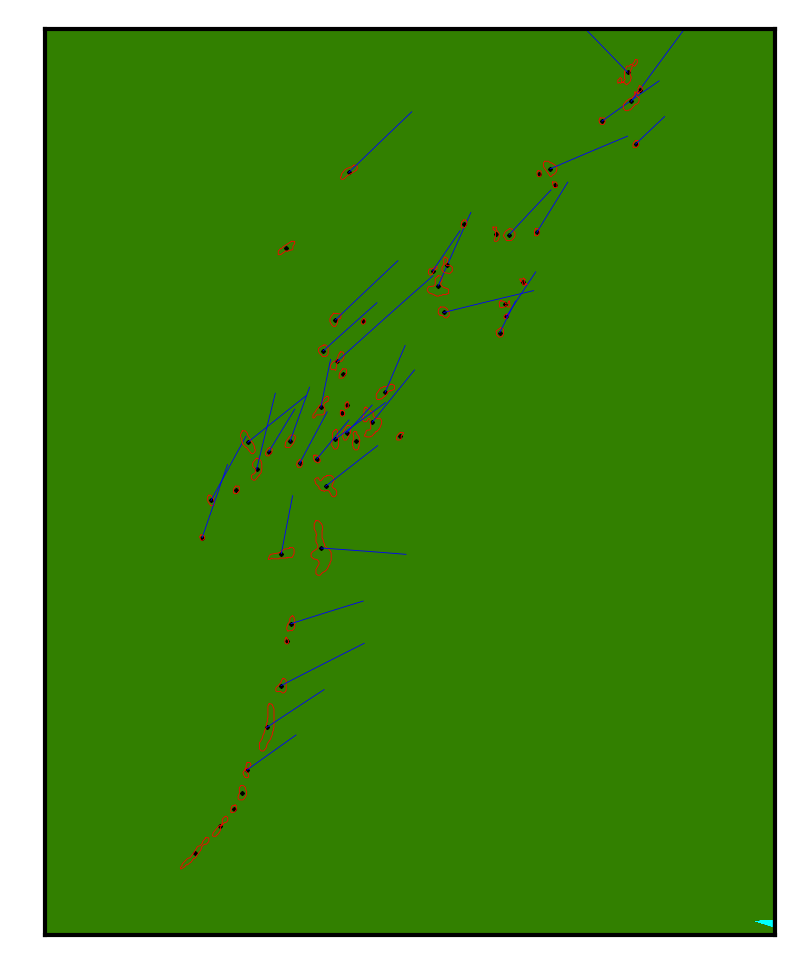

In [10]:
def show_storm_latest():
    paths = glob(os.path.join('../sample_data/', '*.json'))
    paths.sort()
    plt.figure(dpi=300)

    m = make_basemap([30,42],[-102,-90])#REGIONAL

    for i, path in enumerate(paths):
        ps = ProbSevere(json.load(open(path)))
        feature_collection = ps.feature_collection

    for feature in feature_collection['features']:
        plot_storm_latest(feature,m)
    

            
    plt.show()
show_storm_latest()

In [13]:

def plot_storm_89234(feature_collection, m, index):
    vt = feature_collection['validTime']
    x0,y0 = m(-96.48,39.7-index/30)
    if index ==0:
        text= f'STORM89234\ndate:{vt[:8]}\npos:{index}@{vt[9:-6]}Z'
    else:
        text = f'pos:{index}@{vt[9:-6]}Z'
    plt.text(x0,y0, text, fontsize=3)

    # * itterate feature_collection
    for i,feature in enumerate(feature_collection['features']):

        # * plot only storm with id = '89234'
        if feature['properties']['ID'] =='89234':

            # * destructure geometry_collection
            point,polygon,multiline = feature['geometry']['geometries']
            pnt = point['coordinates']
            ply = polygon['coordinates']
            mls = multiline['coordinates']

            # * map storm_center
            center = np.flip([pnt], (0, 1)).flatten()
            x1,y1=m(*center)
            # ? plot center_text
            plt.text(x1,y1, str(index), fontsize=3)
            # ? plot center_point
            m.plot(x1,y1, marker='x',color='k',markersize=.5)

            #  * map pollygon
            shape = np.flip(ply, (0, 2))
            lats,lons=np.rollaxis(shape, 2, 0)
            x1,y1=m(lats,lons)
            # ? plot pollygon
            m.plot(*x1, *y1, color='r', linewidth=.2)

            if mls is not None:
                #  * map pollygon
                lon1,lat1=np.rollaxis(np.array(mls), 1, 0)
                fliped_line = np.flip(mls, (0, 1))
                lon1,lat1=np.rollaxis(fliped_line, 1, 0)
                x1,y1=m(lon1,lat1)
                # ? plot multi line string
                m.plot(x1,y1, color='b', linewidth=.2)

            m.fillcontinents(color=(0.2,0.5,0,.5),lake_color='aqua')
            m.drawmapboundary(fill_color='aqua')

            return plt

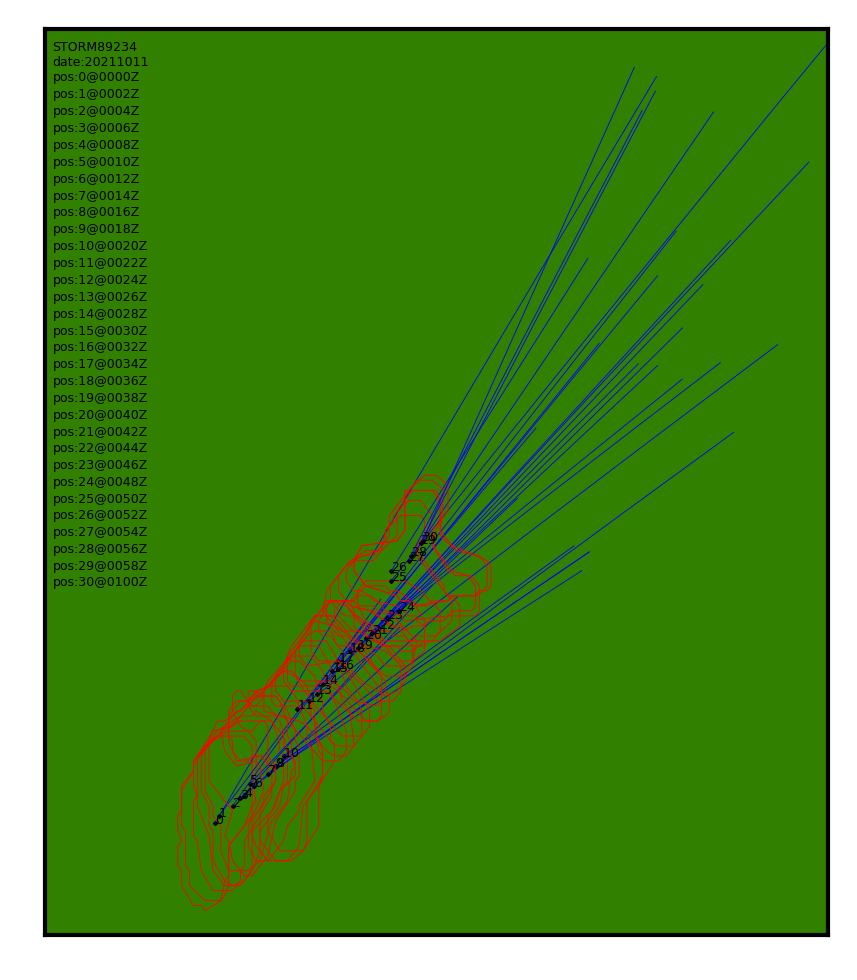

In [14]:
def show_storm_89234():
    paths = glob(os.path.join('../sample_data/', '*.json'))
    paths.sort()
    plt.figure(dpi=300)
    m=make_basemap([38,39.8],[-96.5,-94.5])#STORM89234
    for i, path in enumerate(paths):
        ps = ProbSevere(json.load(open(path)))
        plot_storm_89234( ps.feature_collection, m, i )

    plt.show()
# ! call function to show storm[ID] 89234
show_storm_89234()